In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data Mining/prices-split-adjusted.csv',header=0)
#prices=pd.read_csv('prices.csv')
#fundamentals=pd.read_csv('fundamentals.csv')
#securities=pd.read_csv('securities.csv')

In [ ]:
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
data.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
data.isna().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [ ]:
print("Total Number of Companies are ",len(data.symbol.unique()))
#data.symbol.unique()

Total Number of Companies are  501


In [ ]:
data['symbol'].value_counts().head(10)

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
O       1762
NWL     1762
NVDA    1762
NUE     1762
NTRS    1762
Name: symbol, dtype: int64

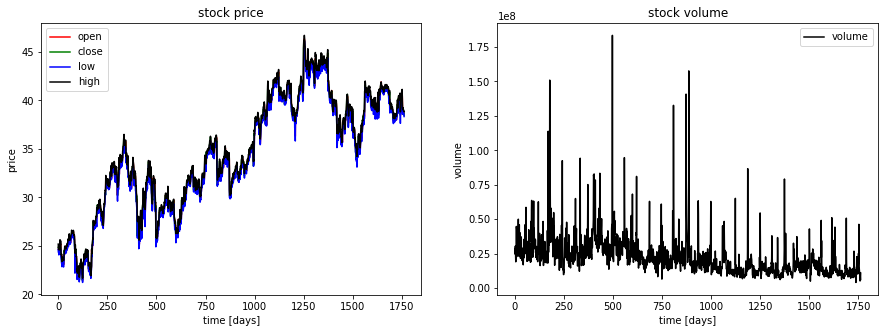

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(data[data.symbol == 'ORCL'].open.values,linestyle='solid', color='red', label='open')
plt.plot(data[data.symbol == 'ORCL'].close.values, color='green', label='close')
plt.plot(data[data.symbol == 'ORCL'].low.values, color='blue', label='low')
plt.plot(data[data.symbol == 'ORCL'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(data[data.symbol == 'ORCL'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

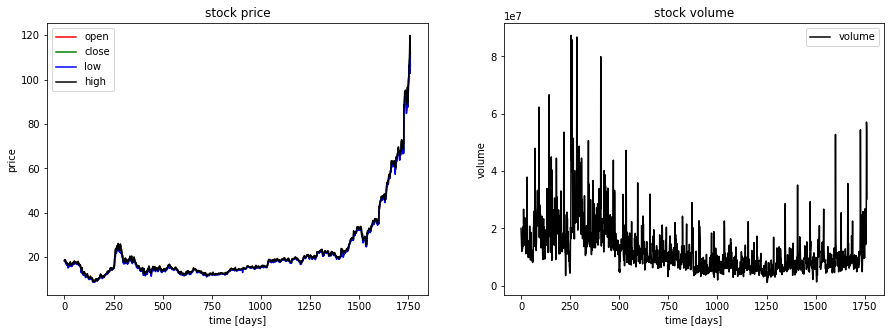

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(data[data.symbol == 'NVDA'].open.values,linestyle='solid', color='red', label='open')
plt.plot(data[data.symbol == 'NVDA'].close.values, color='green', label='close')
plt.plot(data[data.symbol == 'NVDA'].low.values, color='blue', label='low')
plt.plot(data[data.symbol == 'NVDA'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(data[data.symbol == 'NVDA'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
min_max=MinMaxScaler()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
orcl=data[data['symbol']=='ORCL']
values=orcl.close.values

In [ ]:
orcl_data=orcl.drop(['symbol','close','volume','date'],1)
orcl_main=orcl['close']
x_train,x_test,y_train,y_test=train_test_split(orcl_data,orcl_main,test_size=0.2,random_state=27)

<ipython-input-14-0fc8a31c0880>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  orcl_data=orcl.drop(['symbol','close','volume','date'],1)


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()

In [ ]:
y_test

48800     22.639999
78347     21.840000
69905     24.290001
537071    40.529999
643257    43.480000
            ...    
278042    27.930000
73657     23.049999
732719    34.340000
128582    33.139999
36139     26.480000
Name: close, Length: 353, dtype: float64

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr=lr.predict(x_test)

In [ ]:
print('The Accuracy Score of the Linear Regression is ',r2_score(y_pred_lr,y_test))

The Accuracy Score of the Linear Regression is  0.9991390929442954


In [ ]:
y_test.values

array([22.639999, 21.84    , 24.290001, 40.529999, 43.48    , 41.68    ,
       31.48    , 39.810001, 26.200001, 31.950001, 23.27    , 41.43    ,
       39.099998, 40.459999, 42.150002, 38.220001, 40.68    , 22.35    ,
       40.939999, 43.709999, 44.330002, 41.189999, 33.240002, 29.110001,
       32.75    , 33.52    , 34.119999, 38.27    , 38.099998, 31.799999,
       32.369999, 42.939999, 26.68    , 41.889999, 30.82    , 35.580002,
       36.490002, 36.630001, 33.799999, 41.669998, 38.360001, 40.75    ,
       40.759998, 25.950001, 24.969999, 41.740002, 41.060001, 38.84    ,
       30.32    , 35.77    , 26.469999, 27.02    , 36.310001, 35.82    ,
       39.02    , 31.040001, 33.869999, 37.619999, 30.139999, 22.200001,
       26.719999, 32.      , 28.559999, 23.700001, 41.060001, 43.549999,
       33.150002, 42.380001, 39.939999, 25.690001, 40.349998, 29.65    ,
       40.970001, 29.940001, 27.6     , 24.459999, 26.469999, 27.49    ,
       41.93    , 40.880001, 33.099998, 27.700001, 

In [ ]:
#pred_lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr.flatten()})
pred_lr_df=pred_lr_df.sort_index()
pred_lr_df.head()

,Actual,Predicted
571,24.850000,25.093869
1039,24.820000,24.548101
1507,24.459999,24.600575
1975,24.379999,24.298362
5251,25.330000,25.311749


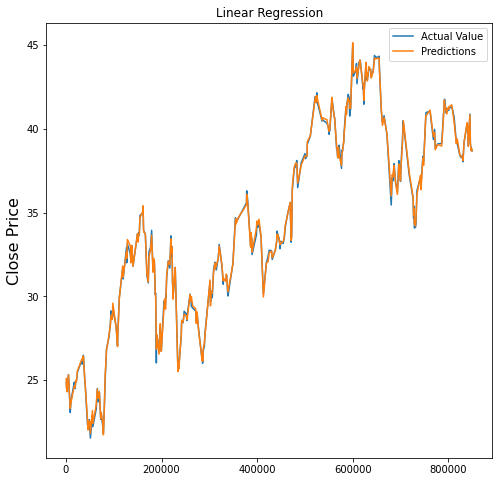

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_lr_df)
plt.title("Linear Regression")
plt.legend(['Actual Value', 'Predictions'])
plt.show()

ANN

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import keras
import time

In [ ]:
ann = Sequential() 
ann.add(Dense(30, kernel_initializer='normal', activation='relu'))
ann.add(Dense(35, kernel_initializer='normal', activation='relu'))
ann.add(Dense(30, kernel_initializer='normal', activation='relu'))
ann.add(Dense(1, kernel_initializer='normal'))
ann.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
ann.fit(x_train,y_train,epochs=100,batch_size=128,validation_split=0.05,verbose=2)

Epoch 1/100
11/11 - 1s - loss: 1210.3157 - val_loss: 1246.8649 - 1s/epoch - 96ms/step
Epoch 2/100
11/11 - 0s - loss: 1185.0510 - val_loss: 1202.7174 - 50ms/epoch - 5ms/step
Epoch 3/100
11/11 - 0s - loss: 1118.1163 - val_loss: 1087.8344 - 46ms/epoch - 4ms/step
Epoch 4/100
11/11 - 0s - loss: 955.8861 - val_loss: 836.0287 - 46ms/epoch - 4ms/step
Epoch 5/100
11/11 - 0s - loss: 640.8924 - val_loss: 413.8138 - 59ms/epoch - 5ms/step
Epoch 6/100
11/11 - 0s - loss: 216.6049 - val_loss: 31.5249 - 77ms/epoch - 7ms/step
Epoch 7/100
11/11 - 0s - loss: 13.0865 - val_loss: 33.6941 - 49ms/epoch - 4ms/step
Epoch 8/100
11/11 - 0s - loss: 21.1184 - val_loss: 1.3495 - 63ms/epoch - 6ms/step
Epoch 9/100
11/11 - 0s - loss: 1.6694 - val_loss: 4.1647 - 50ms/epoch - 5ms/step
Epoch 10/100
11/11 - 0s - loss: 2.3393 - val_loss: 0.1855 - 49ms/epoch - 4ms/step
Epoch 11/100
11/11 - 0s - loss: 0.2905 - val_loss: 0.4628 - 57ms/epoch - 5ms/step
Epoch 12/100
11/11 - 0s - loss: 0.2772 - val_loss: 0.0625 - 46ms/epoch - 4ms

In [ ]:
y_pred_ann=ann.predict(x_test)

12/12 [==============================] - 0s 2ms/step


In [ ]:
print('The Accuracy Score of the ANN is ',r2_score(y_test,y_pred_ann))

The Accuracy Score of the ANN is  0.9973180988534979


In [ ]:
pred_ann_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann.flatten()})
pred_ann_df=pred_ann_df.sort_index()


In [ ]:
pred_ann_df.head()

,Actual,Predicted
571,24.850000,24.999655
1039,24.820000,24.838089
1507,24.459999,24.887197
1975,24.379999,24.584982
5251,25.330000,25.491991


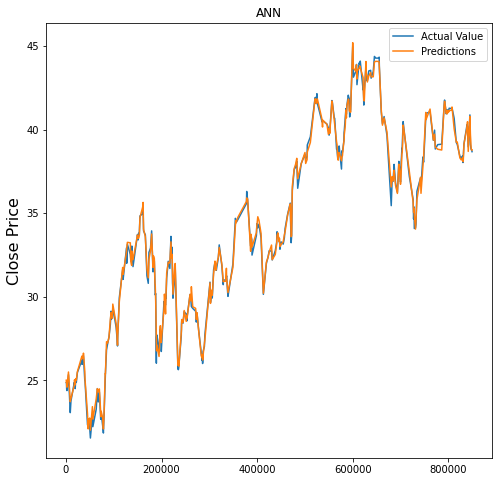

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_ann_df)
plt.title("ANN")
plt.legend(['Actual Value', 'Predictions'])
plt.show()

LSTM

In [ ]:
#Ensuring all the data is float 
values=values.astype('float32')
values=values.reshape(1762,1)

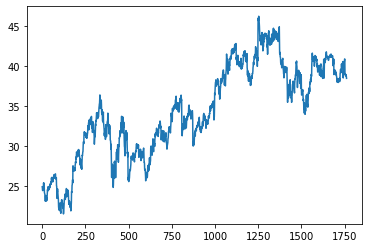

In [ ]:
plt.plot(values)
plt.show()

In [ ]:
#Normalizing the Features
values_scaled=min_max.fit_transform(values)

In [ ]:
train_size=int(len(values_scaled)*0.80)
test_size=len(values_scaled)-train_size

In [ ]:
train=values_scaled[0:train_size,:]
test=values_scaled[train_size:,:]
print(len(train))
print(len(test))

1409
353


In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
X_train,y_train=create_dataset(train,2)
X_test,y_test=create_dataset(test,2)
X_train.shape

(1406, 2)

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
X_train.shape

(1406, 1, 2)

In [ ]:
model = Sequential()

model.add(LSTM(10,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.00995945930480957


In [ ]:
model.fit(X_train,y_train,batch_size=128,epochs=100,validation_split=0.05,verbose=2)

Epoch 1/100
11/11 - 14s - loss: 0.2162 - val_loss: 0.5023 - 14s/epoch - 1s/step
Epoch 2/100
11/11 - 0s - loss: 0.1393 - val_loss: 0.3404 - 100ms/epoch - 9ms/step
Epoch 3/100
11/11 - 0s - loss: 0.0806 - val_loss: 0.1999 - 91ms/epoch - 8ms/step
Epoch 4/100
11/11 - 0s - loss: 0.0427 - val_loss: 0.1041 - 90ms/epoch - 8ms/step
Epoch 5/100
11/11 - 0s - loss: 0.0280 - val_loss: 0.0586 - 96ms/epoch - 9ms/step
Epoch 6/100
11/11 - 0s - loss: 0.0221 - val_loss: 0.0461 - 97ms/epoch - 9ms/step
Epoch 7/100
11/11 - 0s - loss: 0.0190 - val_loss: 0.0317 - 86ms/epoch - 8ms/step
Epoch 8/100
11/11 - 0s - loss: 0.0143 - val_loss: 0.0230 - 86ms/epoch - 8ms/step
Epoch 9/100
11/11 - 0s - loss: 0.0116 - val_loss: 0.0090 - 103ms/epoch - 9ms/step
Epoch 10/100
11/11 - 0s - loss: 0.0084 - val_loss: 0.0063 - 94ms/epoch - 9ms/step
Epoch 11/100
11/11 - 0s - loss: 0.0082 - val_loss: 0.0069 - 97ms/epoch - 9ms/step
Epoch 12/100
11/11 - 0s - loss: 0.0071 - val_loss: 8.6050e-04 - 100ms/epoch - 9ms/step
Epoch 13/100
11/11 

In [ ]:
y_pred=model.predict(X_test)

11/11 [==============================] - 1s 2ms/step


In [ ]:
y_pred=y_pred.reshape(350,1)

In [ ]:
y_pred=min_max.inverse_transform(y_pred)

In [ ]:
#m=keras.metrics.MeanSquaredError()

In [ ]:
y_inv=min_max.inverse_transform([y_test])

In [ ]:
#m.update_state(y_test,y_pred)
#m.result().numpy()
len(y_pred.flatten())

350

In [ ]:
pred_lstm_df = pd.DataFrame({'Actual': y_inv.flatten(), 'Predicted': y_pred.flatten()})
pred_lstm_df.head()

,Actual,Predicted
0,39.279998,39.363605
1,39.310001,39.098171
2,39.410001,39.162304
3,39.720002,39.225712
4,39.830001,39.425106


In [ ]:

 
print("Accuracy score of the predictions: {0}".format(r2_score(y_inv.flatten(), y_pred.flatten())))

Accuracy score of the predictions: 0.9093599707508924


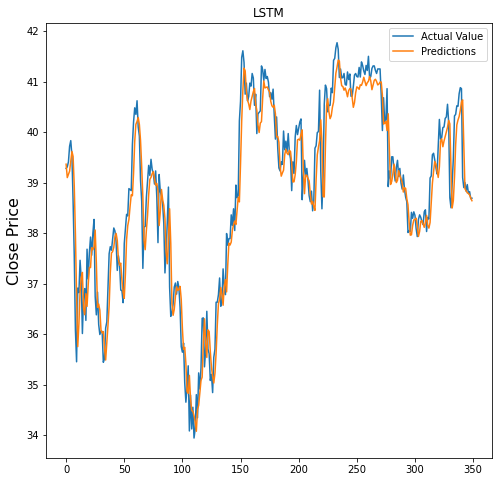

In [ ]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_lstm_df)
plt.legend(['Actual Value', 'Predictions'])
plt.title("LSTM")
plt.show()